In [7]:
import numpy as np
import lmfit as lmf
from lmfit import Model
import matplotlib.pyplot as plt
%matplotlib inline

9.283177667225546e-05

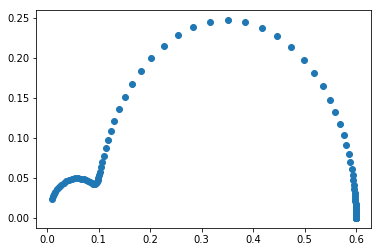

In [141]:
## Generate and plot some fake data, currently without noise. 
w= np.logspace(0,6,num=100)

Rf1 = .1
Q1 = 1e-4
a1 = 0.93

Rf2 = .5
Q2= 1e-3
a2 = .99

def arc(w,Rf,Q,a):
    return Rf/(1+((1j*w)**a)*Q*Rf)

Z = arc(w,Rf1,Q1,a1)+ arc(w,Rf2,Q2,a2)
plt.plot(np.real(Z),-np.imag(Z),'o')
np.argwhere(abs(np.real(Z)-.05)<.01)
1/(.05*w[88])



[[Model]]
    Model(arc, prefix='a1_')
[[Fit Statistics]]
    # function evals   = 53
    # data points      = 200
    # variables        = 3
    chi-square         = 0.147
    reduced chi-square = 0.001
    Akaike info crit   = -1437.388
    Bayesian info crit = -1427.493
[[Variables]]
    a1_Rf:   0.61325197 +/- 0.004417 (0.72%) (init= 0.5)
    a1_Q:    0.00318523 +/- 0.000376 (11.82%) (init= 0.001)
    a1_a:    0.78353299 +/- 0.014246 (1.82%) (init= 0.95)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1_Q, a1_a)                = -0.975 
    C(a1_Rf, a1_Q)               =  0.439 
    C(a1_Rf, a1_a)               = -0.421 



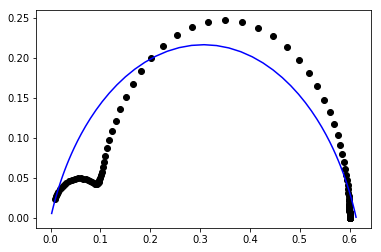

In [142]:
#make model to fit 2 arcs with a 1-arc model (it shouldn't fit well)
model = Model(arc,prefix = "a1_") 

pars = model.make_params(a1_Rf = .5, a1_Q = 1e-3, a1_a = .95)
pars['a1_a'].min = 0
pars['a1_a'].max = 1
#pars['a2_a'].min = 0
#pars['a2_a'].max=1

result = model.fit(Z,pars,w=w)
plt.plot(np.real(Z),-np.imag(Z),'ko')
plt.plot(np.real(result.best_fit),-np.imag(result.best_fit),'b-')
print(result.fit_report())

[[Model]]
    (Model(arc, prefix='a1_') + Model(arc, prefix='a2_'))
[[Fit Statistics]]
    # function evals   = 52
    # data points      = 200
    # variables        = 6
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -15281.918
    Bayesian info crit = -15262.128
[[Variables]]
    a1_Rf:   0.50000000 +/- 1.04e-17 (0.00%) (init= 0.5)
    a1_Q:    0.00100000 +/- 1.41e-19 (0.00%) (init= 0.001)
    a1_a:    0.99000000 +/- 2.08e-17 (0.00%) (init= 0.95)
    a2_a:    0.93000000 +/- 1.10e-16 (0.00%) (init= 0.95)
    a2_Q:    0.00010000 +/- 1.37e-19 (0.00%) (init= 0.0001)
    a2_Rf:   0.10000000 +/- 9.04e-18 (0.00%) (init= 0.1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a2_a, a2_Q)                = -0.994 
    C(a1_Q, a1_a)                = -0.959 
    C(a1_Rf, a2_Rf)              = -0.932 
    C(a1_Rf, a1_a)               = -0.700 
    C(a2_Q, a2_Rf)               =  0.684 
    C(a2_a, a2_Rf)               = -0.676 
    C(a1_a, a2_Rf)

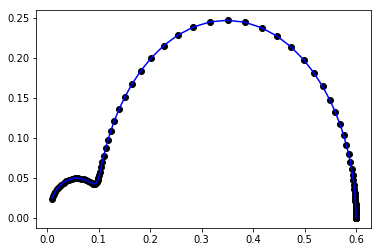

In [143]:
# try and add in second arc
model +=Model(arc,prefix = "a2_") 

pars.add('a2_a', value=0.95, min=0, max=1)
pars.add('a2_Q', value=1e-4)
pars.add('a2_Rf', value=.1)



result = model.fit(Z,pars,w=w)
plt.plot(np.real(Z),-np.imag(Z),'ko')
plt.plot(np.real(result.best_fit),-np.imag(result.best_fit),'b-')
print(result.fit_report())
#result.plot()

In [92]:
print(Rf1,Q1,a1,Rf2,Q2,a2)

0.1 0.0005 0.93 0.5 0.001 0.99


array([ 0.0006454 ,  0.00159698,  0.00013996])

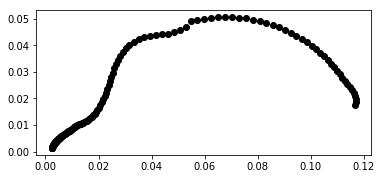

In [196]:
#switching to real data
w = np.genfromtxt('wTest')
Zr = np.genfromtxt('ZrTest')
Zi = np.genfromtxt('ZiTest')
fig,ax = plt.subplots(1,1)
ax.plot(Zr,-Zi,'ko')
ax.set_aspect('equal')

#Guess R's (from right to left)
Rfest = np.array([.1, .02, .02])

#input estimates of peak Zr's
peaks = np.array([.07, .04, .01])

#calculate estimates for Q
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

wpeak = np.array([w[find_nearest_index(Zr,peaks[0])],w[find_nearest_index(Zr,peaks[1])],w[find_nearest_index(Zr,peaks[2])]])
Qest = 1/(Rfest*wpeak)
Qest



[[Model]]
    ((Model(arc, prefix='a1_') + Model(arc, prefix='a2_')) + Model(arc, prefix='a3_'))
[[Fit Statistics]]
    # function evals   = 108
    # data points      = 286
    # variables        = 9
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -3810.242
    Bayesian info crit = -3777.338
[[Variables]]
    a1_Rf:   0.10490066 +/- 0.001821 (1.74%) (init= 0.1)
    a1_Q:    0.00070057 +/- 3.70e-05 (5.28%) (init= 0.0006453972)
    a1_a:    0.98109718 +/- 0.006841 (0.70%) (init= 0.95)
    a2_Rf:   0.00310914 +/- 0.021578 (694.02%) (init= 0.02)
    a2_Q:    0.00522923 +/- 2.28e+03 (43683325.84%) (init= 0.001596979)
    a2_a:    0.03700582 +/- 8.34e+03 (22534429.27%) (init= 0.95)
    a3_Rf:   0.01227372 +/- 0.002460 (20.05%) (init= 0.02)
    a3_Q:    0.00050329 +/- 0.000400 (79.55%) (init= 0.0001399632)
    a3_a:    0.91199859 +/- 0.073554 (8.07%) (init= 0.95)
[[Correlations]] (unreported correlations are <  0.100)
    C(a3_Q, a3_a)                = 

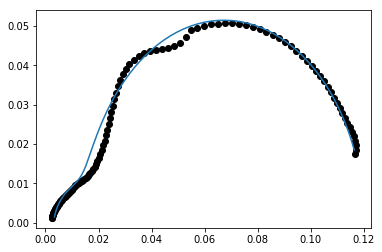

In [197]:
threearc = Model(arc,prefix='a1_')+Model(arc,prefix='a2_')+Model(arc,prefix='a3_')
pars = threearc.make_params()

pars.add('a1_a', value=0.95, min=0, max=1)
pars.add('a1_Q', value=Qest[0])
pars.add('a1_Rf', value=Rfest[0])

pars.add('a2_a', value=0.95, min=0, max=1)
pars.add('a2_Q', value=Qest[1])
pars.add('a2_Rf', value=Rfest[1])

pars.add('a3_a', value=0.95, min=0, max=1)
pars.add('a3_Q', value=Qest[2])
pars.add('a3_Rf', value=Rfest[2])

result = threearc.fit(Zr+1j*Zi,pars, w=w)
fig,ax = plt.subplots(1,1)
ax.plot(Zr,-Zi,'ko')
ax.plot(np.real(result.best_fit),-np.imag(result.best_fit))

print(result.fit_report())

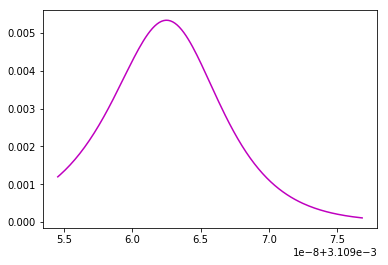

In [199]:
comps = result.eval_components()
#plt.plot(Zr,-Zi,'ko')
# plt.plot(np.real(comps['a1_']),-np.imag(comps['a1_']),'b')
# plt.plot(np.real(comps['a2_']),-np.imag(comps['a2_']),'r')
plt.plot(np.real(comps['a2_']),-np.imag(comps['a3_']),'m')